In [2]:
import pandas as pd 
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xpresstools as xp

/Users/jordan/scripts/XPRESSyourself/XPRESStools/xpresstools/normalize.py:31: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/s

### Read in subset of mock dataset (data was RPKM normalized before subsetting)

In [16]:
path = './'

data = pd.read_csv(
        path + 'heatmap_example.tsv',
        sep = '\t',
        index_col = 0)
info = pd.read_csv(
        path + 'heatmap_example_metadata.txt',
        sep = '\t',
        header = None)

In [17]:
#Create a samples color dictionary for plots
colors = {'WT':'yellow',
       'EXP':'purple'}

In [18]:
#Specify column order for dataframe
col_order = ['WT1',
             'WT2',
             'WT3',
             'WT4',
             'WT5',
             'WT6',
             'EXP1',
             'EXP2',
             'EXP3',
             'EXP4',
             'EXP5',
             'EXP6']

data = data.reindex(col_order, axis=1)

In [19]:
#Scale gene rows
data_scaled = data.copy()
data_scaled = data_scaled.dropna()
data_scaled[data_scaled.columns] = preprocessing.scale(data_scaled[data_scaled.columns], axis=1)

#Print some info        
print('Dataframe size before scaling: ' + str(data.shape))
print('Dataframe size after scaling: ' + str(data_scaled.shape))

Dataframe size before scaling: (10, 12)
Dataframe size after scaling: (10, 12)


### Without scaling

<Figure size 432x288 with 0 Axes>

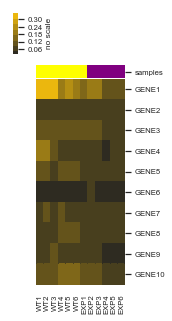

In [28]:
#Plot heatmap
xp.heatmap(
    data, 
    info, 
    sample_palette = colors, 
    figsize = (2, 5), 
    xticklabels = True, 
    yticklabels = True, 
    row_cluster = False, 
    col_cluster = False, 
    font_scale = .7,
    cbar_kws = {'label': 'no scale'})


#Save and show figure
plt.savefig(
    path + 'heatmap_unscaled_example.png',
    dpi = 300,
    bbox_inches = 'tight')
plt.show()

### With scaling

<Figure size 432x288 with 0 Axes>

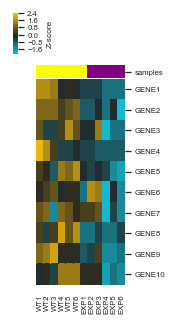

In [29]:
#Plot heatmap
xp.heatmap(
    data_scaled, 
    info, 
    sample_palette = colors, 
    figsize = (2, 5), 
    xticklabels = True, 
    yticklabels = True, 
    row_cluster = False, 
    col_cluster = False, 
    font_scale = .7,
    cbar_kws = {'label': 'Z-score'})


#Save and show figure
plt.savefig(
    path + 'heatmap_scaled_example.png',
    dpi = 300,
    bbox_inches = 'tight')
plt.show()